# Upward and Downward Continuation

### **This notebook ilustrate how to get an upward continuated data and it shows the differences between calculated the filtered data using Simple Fourier Domain and the function from Fatiando.**

** The simple gravity data in Fourier Domain can be expressed by using the Fourier Transform as follow:**

# $$\mathcal{F}\left[G(x,y)\right] = \int G(x,y)\, e^{-i(K_{x}x \, + \, K_ {y}y)}\, dx\,dy$$

**where $G(x)$ is the simple gravity data in the space domain.**

** The continuation filter expression is given by:**
# $$ \mathcal{K}(u,v) = e^{-h \,(k_{x}^2 + k_{y}^2)^{\frac{1}{2}}}$$

**where $h = d - z$ is the difference between the new level of observation $d$ and the original observation height $z$; $k_x$ and $k_y$ are the wavenumber in $X$ and $Y$ directions; and $\mathcal{K}$ is the filter which will be applied on the gravity data.**

**The exponential can be positive or negative:**
* $d > z \rightarrow\, h > 0$ - upward continuation;
* $d < z \rightarrow\, h < 0$ - downward continuation.


**The continuated data is obtained by multiplying the filter $\mathcal{K}$ and the gravity transformed data $G(k)$. After that, it should be applied the inverse Fourier transform on the continuated data for return on the gravity data in space domain.**

In [2]:
# Copying all usefull libraries
import numpy as np
import gravmag as gmc
import matplotlib.pyplot as plt

## Example 1 - Magnetic data

In [3]:
# Definition for number of points and grid creation
npts = 500
x = np.linspace(-3000., 3000., npts)
y = np.copy(x)
z = -20.

# Creat the grid file
X, Y = np.meshgrid(x, y)

In [4]:
#Informations about the rectangular prisms that we will use
prism1 = [-800., -500., -2000., -1700., 400., 1200., 1.275]
prism2 = [1200., 2500., 1200., 2500., 4000., 6000., -1.5]

# Informations about the values for inclination and declination
direc1 = [32., -61., 0.] # degrees
direc2 = [-45., 45., 0.] # degrees
field = [50., -22., 0.] # degres
# Here we assume that both prism have the same inc and dec

In [6]:
# Calculate the total field anomaly
tfa1 = gmc.prism_tf(X, Y, z, prism1, direc1, field)
tfa2 = gmc.prism_tf(X, Y, z, prism2, direc2, field)
tfa = tfa1 + tfa2

In [7]:
#Calculating the wavenumbers
u = 2.0*np.pi* np.fft.fftfreq(tfa.shape[0], x[1] - x[0])
v = 2.0*np.pi* np.fft.fftfreq(tfa.shape[1], y[1] - y[0])
U,V = np.meshgrid(u,v)

In [16]:
print(u)

[ 0.          0.0010451   0.00209021  0.00313531  0.00418041  0.00522552
  0.00627062  0.00731572  0.00836083  0.00940593  0.01045103  0.01149613
  0.01254124  0.01358634  0.01463144  0.01567655  0.01672165  0.01776675
  0.01881186  0.01985696  0.02090206  0.02194717  0.02299227  0.02403737
  0.02508248  0.02612758  0.02717268  0.02821779  0.02926289  0.03030799
  0.03135309  0.0323982   0.0334433   0.0344884   0.03553351  0.03657861
  0.03762371  0.03866882  0.03971392  0.04075902  0.04180413  0.04284923
  0.04389433  0.04493944  0.04598454  0.04702964  0.04807475  0.04911985
  0.05016495  0.05121005  0.05225516  0.05330026  0.05434536  0.05539047
  0.05643557  0.05748067  0.05852578  0.05957088  0.06061598  0.06166109
  0.06270619  0.06375129  0.0647964   0.0658415   0.0668866   0.06793171
  0.06897681  0.07002191  0.07106701  0.07211212  0.07315722  0.07420232
  0.07524743  0.07629253  0.07733763  0.07838274  0.07942784  0.08047294
  0.08151805  0.08256315  0.08360825  0.08465336  0

In [15]:
plt.figure()
plt.contourf(U, V, np.imag(TFA_up), 50, cmap = plt.cm.rainbow)
plt.colorbar()
plt.show()

In [10]:
print(U.size)

250000


In [13]:
# Filtering the data
D = 250. # meters # H = 2000 - z > 0 - UPWARD!
TFA = np.fft.fft2(tfa) # Fourier transform for total field
K_up = np.exp(-(D-z)*(np.sqrt(U**2 + V**2))) # Filter calculation
TFA_cont = TFA*K_up # Applieding the filter
TFA_up = (np.fft.ifft2(TFA_cont)) # Applieding the inverse Fourier

In [7]:
# Defines the valus for colorbar
print 'Minimum and maximum - first prism:', np.min(tfa1), '/', np.max(tfa1)
print 'Minimum and maximum - second prism:', np.min(tfa2),  '/', np.max(tfa2)
print 'Minimum and maximum - both prisms:', np.min(tfa),  '/', np.max(tfa)
print 'Minimum and maximum - upward data:', np.min(TFA_up),  '/', np.max(TFA_up)
values = [np.min(tfa1), np.max(tfa1), 
          np.min(tfa2), np.max(tfa2), 
          np.min(tfa), np.max(tfa), 
          np.min(TFA_up), np.max(TFA_up)]
print np.min(values)
print np.max(values)

# Defining the colorbar
vcor = np.linspace(tfa.min(), tfa.max(), 200)

Minimum and maximum - first prism: -380.785588959 / 157.070027995
Minimum and maximum - second prism: -475.535276749 / -29.4618443222
Minimum and maximum - both prisms: -506.746039165 / 81.1469596362
Minimum and maximum - upward data: -407.564273058 / -66.8462806951
-506.746039165
157.070027995


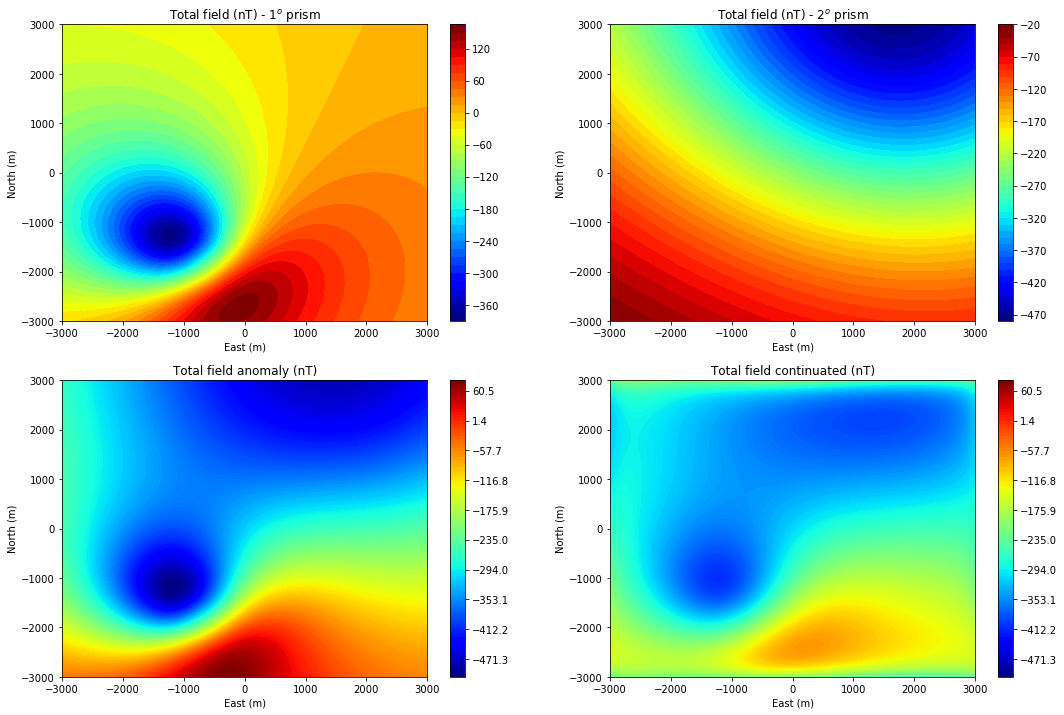

In [13]:
# Plot the map for total field anomaly
plt.close('all')
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title('Total field (nT) - $1^o$ prism')
fig1 = plt.contourf(X, Y, tfa1, 50, vmin = np.min(tfa1), vmax = np.max(tfa1), cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.xlim(np.min(X), np.max(X))
plt.ylim(np.min(Y), np.max(Y))
cb1 = plt.colorbar(fig1)
cb2lim = plt.clim(np.min(tfa1), np.max(tfa1))

plt.subplot(2,2,2)
plt.title('Total field (nT) - $2^o$ prism')
fig2 = plt.contourf(X, Y, tfa2, 50, cmap = plt.cm.jet, vmin = np.min(tfa2), vmax = np.max(tfa2))
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.xlim(np.min(X), np.max(X))
plt.ylim(np.min(Y), np.max(Y))
cb2 = plt.colorbar(fig2)
cb2lim = plt.clim(np.min(tfa2), np.max(tfa2))

plt.subplot(2,2,3)
plt.title('Total field anomaly (nT)')
fig3 = plt.contourf(X, Y, tfa, vcor, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.xlim(np.min(X), np.max(X))
plt.ylim(np.min(Y), np.max(Y))
cb3 = plt.colorbar(fig3)
cb3lim = plt.clim(vcor.min(), vcor.max())

plt.subplot(2,2,4)
plt.title('Total field continuated (nT)')
fig4 = plt.contourf(X, Y, TFA_up, vcor, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.xlim(np.min(X), np.max(X))
plt.ylim(np.min(Y), np.max(Y))
cb4 = plt.colorbar(fig4)
cb4lim = plt.clim(vcor.min(), vcor.max())

plt.savefig('figs/magneticdata.png')
plt.show()

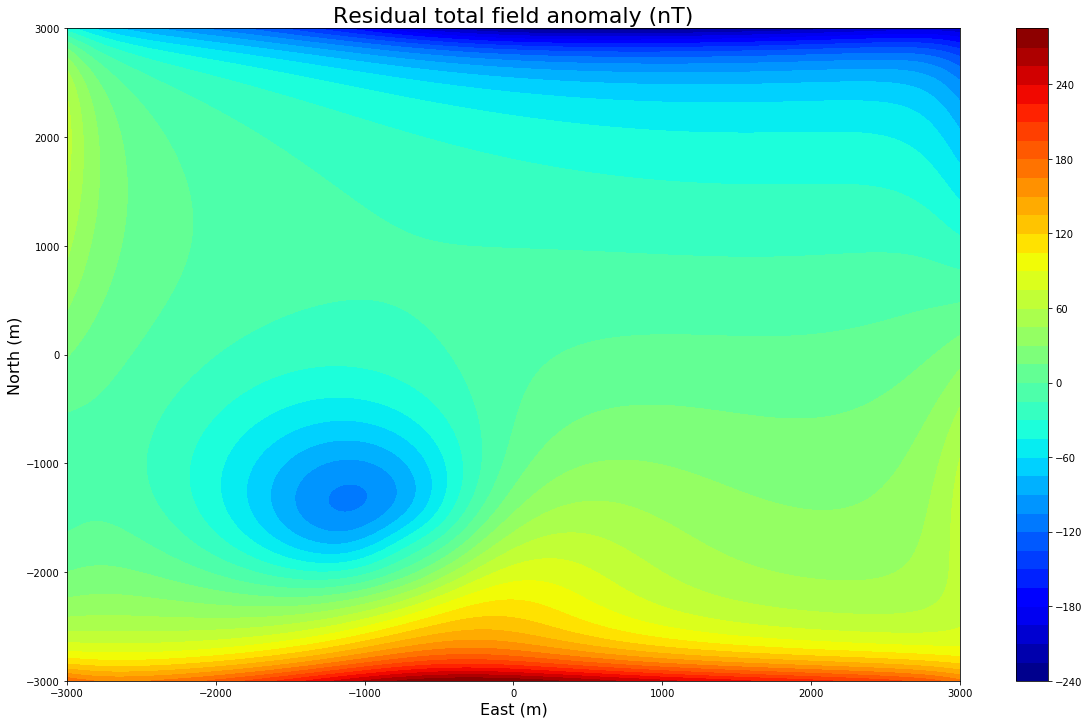

In [12]:
# Plotting the residual file
plt.figure(figsize=(20,12))
plt.title('Residual total field anomaly (nT)', fontsize = 22)
fig5 = plt.contourf(X, Y, tfa - TFA_up, 50, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 16)
plt.ylabel('North (m)', fontsize = 16)
plt.xlim(np.min(X), np.max(X))
plt.ylim(np.min(Y), np.max(Y))
plt.colorbar(fig5)
plt.savefig('figs/residualmagnetic.png')
plt.show()

In [14]:
# Import libraries from Fatiando
from fatiando import mesher, gridder, utils
from fatiando.gravmag import sphere, prism, transform

/home/nielsen/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [15]:
# Calculated data from fatiando
shape = (npts, npts) # number of data in X and Y directions
N = shape[0]*shape[1] # number of data
area = [-5000, 5000, -5000, 5000] # maximum and minimum in X and Y directions
xp, yp = gridder.regular(area, shape) # regular grid

# Calculated the continuated data
cont_data = transform.upcontinue(xp, yp, tfa, shape, D)

In [16]:
# Reshape
cont_data = cont_data.reshape(shape)

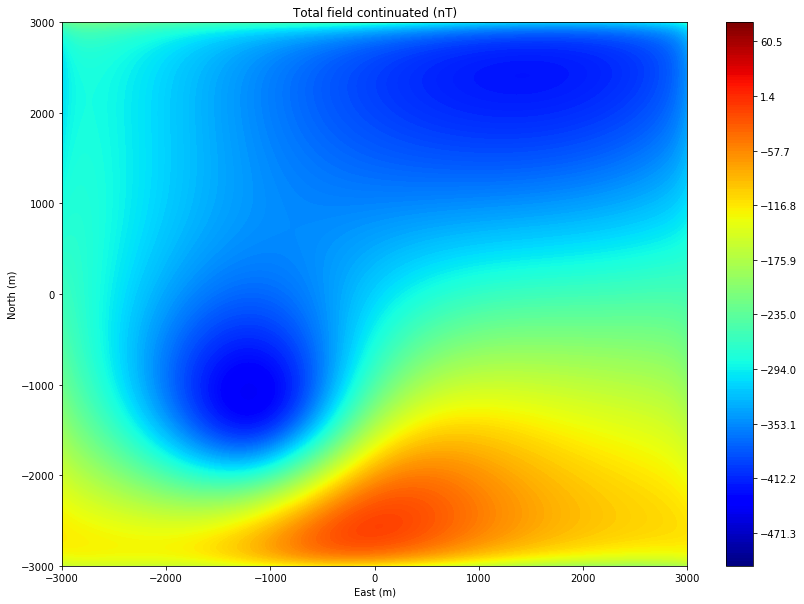

In [18]:
# Plot the total field anomaly continuated
plt.figure(figsize=(14,10))
plt.title('Total field continuated (nT)')
figfat = plt.contourf(X, Y, cont_data, vcor, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.xlim(np.min(X), np.max(X))
plt.ylim(np.min(Y), np.max(Y))
plt.colorbar(figfat)
plt.show()

# Example 2 - Gravity data

In [19]:
# Definition for number of points and grid creation
npts = 500
x = np.linspace(-3000., 3000., npts)
y = np.copy(x)
z = -20.

# Creat the grid file
X, Y = np.meshgrid(x, y)

In [20]:
#Informations about the rectangular prisms that we will use
prism1 = [-1100., -300., 0., 800., 250., 850., 1.8475]
prism2 = [700., 1500., -1400., 600., 2000., 3500., 2.67]

In [21]:
# Calculate the total field anomaly
gz1 = gmc.prism_gz(X, Y, z, prism1)
gz2 = gmc.prism_gz(X, Y, z, prism2)
gz = gz1 + gz2

In [22]:
#Calculating the wavenumbers
u = 2.0*np.pi* np.fft.fftfreq(gz.shape[0], x[1] - x[0])
v = 2.0*np.pi* np.fft.fftfreq(gz.shape[1], y[1] - y[0])
U,V = np.meshgrid(u,v)

In [23]:
# Filtering the data
D = 500. # meters # H = 800 - z > 0 - UPWARD!
Gz = np.fft.fft2(gz) # Fourier transform for total field
K_up = np.exp(-(D-z)*(np.sqrt(U**2 + V**2))) # Filter calculation
Gz_cont = Gz*K_up # Applieding the filter
Gz_upward = np.real(np.fft.ifft2(Gz_cont)) # Applieding the inverse Fourier

In [24]:
# Setting the color bar values
gcor = np.linspace(gz.min(), gz.max(), 200)

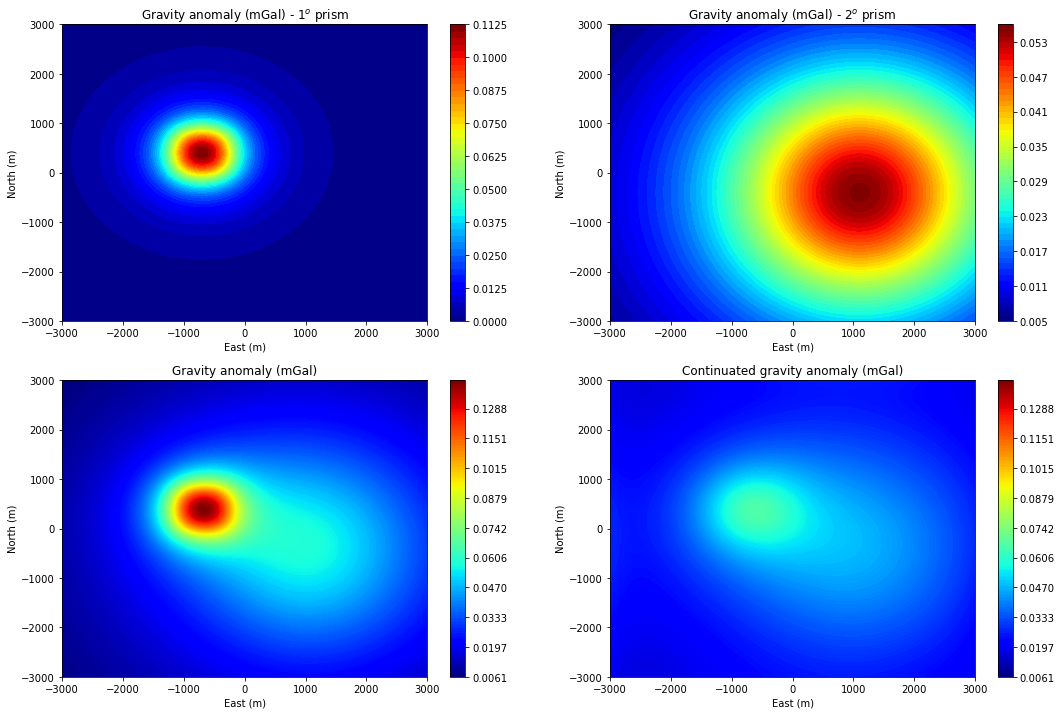

In [27]:
# Plot the map for total field anomaly
plt.close('all')
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title('Gravity anomaly (mGal) - $1^o$ prism')
g1 = plt.contourf(X, Y, gz1, 50, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.xlim(np.min(X), np.max(X))
plt.ylim(np.min(Y), np.max(Y))
plt.colorbar(g1)
plt.clim(gz1.min(), gz1.max())

plt.subplot(2,2,2)
plt.title('Gravity anomaly (mGal) - $2^o$ prism')
g2 = plt.contourf(X, Y, gz2, 50, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.xlim(np.min(X), np.max(X))
plt.ylim(np.min(Y), np.max(Y))
plt.colorbar(g2)
plt.clim(gz2.min(), gz2.max())

plt.subplot(2,2,3)
plt.title('Gravity anomaly (mGal)')
g3 = plt.contourf(X, Y, gz, gcor, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.xlim(np.min(X), np.max(X))
plt.ylim(np.min(Y), np.max(Y))
plt.colorbar(g3)
plt.clim(gcor.min(), gcor.max())

plt.subplot(2,2,4)
plt.title('Continuated gravity anomaly (mGal)')
g4 = plt.contourf(X, Y, Gz_upward, gcor, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.xlim(np.min(X), np.max(X))
plt.ylim(np.min(Y), np.max(Y))
plt.colorbar(g4)
plt.clim(gcor.min(), gcor.max())

plt.savefig('figs/gravitydata.png')
plt.show()

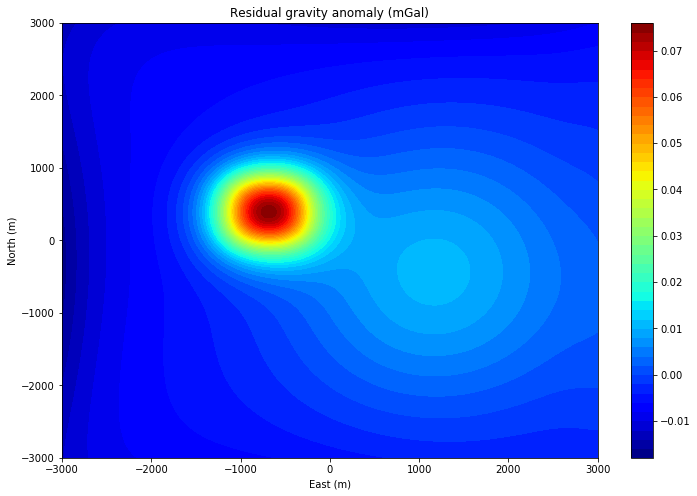

In [29]:
plt.figure(figsize=(12,8))
plt.title('Residual gravity anomaly (mGal)')
plt.contourf(X, Y, gz - Gz_upward, 50, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.xlim(np.min(X), np.max(X))
plt.ylim(np.min(Y), np.max(Y))
plt.colorbar()

plt.savefig('figs/gravitydata.png')
plt.show()

# Example 3 - Real gravity data

In [30]:
# Reading the file
East, North, Elev, Freeair, Bouguer = np.loadtxt('north-grav.dat', skiprows=1, usecols=(0, 1, 2, 4, 5), unpack=True)

In [31]:
# Reshape all data
UTMX = np.linspace(East[0], East[-1], 101)
UTMY = np.linspace(North[0], North[-1], 201)
shape = (UTMY.size, UTMX.size)
# Grid calculation
Xgrid, Ygrid = np.meshgrid(UTMX, UTMY)

# Elevation, Freeair anomaly and Bouguer anomaly
Elev = Elev.reshape(shape)
Freeair = Freeair.reshape(shape)
Bouguer = Bouguer.reshape(shape)

In [32]:
#Calculating the wavenumbers
kx = 2.0*np.pi* np.fft.fftfreq(Bouguer.shape[1], UTMX[1] - UTMX[0])
ky = 2.0*np.pi* np.fft.fftfreq(Bouguer.shape[0], UTMY[1] - UTMY[0])
KX, KY = np.meshgrid(kx, ky)

In [33]:
# Filtering the data
Distance = 20.*np.max(Elev)
FA_trans = np.fft.fft2(Freeair) 
BG_trans = np.fft.fft2(Bouguer)
K = np.exp(-(Distance-Elev)*(np.sqrt(KX**2 + KY**2)))
print 'Maximum elevation value (in meters):', np.max(Elev)
print 'Distance data will be continuated (in meters):', Distance

Maximum elevation value (in meters): 142.6
Distance data will be continuated (in meters): 2852.0


In [35]:
# Freeair anomaly filtered
FA_cont = FA_trans*K
Freeair_upward = np.real(np.fft.ifft2(FA_cont))

# Bouguer anomaly filtered
BG_cont = BG_trans*K
Bouguer_upward = np.real(np.fft.ifft2(BG_cont))

In [36]:
print 'From original values (in mGal):'
print '* Freeair anomaly:', np.max(Freeair),'/', np.min(Freeair)
print '* Bouguer anomaly:', np.max(Bouguer),'/', np.min(Bouguer)
print
print 'From continuated values (in mGal):'
print '* Freeair upward:', np.max(Freeair_upward),'/', np.min(Freeair_upward)
print '* Bouguer upward:', np.max(Bouguer_upward),'/', np.min(Bouguer_upward)

From original values (in mGal):
* Freeair anomaly: 34.3428774105 / -50.0824561577
* Bouguer anomaly: 26.6698391768 / -57.1037904718

From continuated values (in mGal):
* Freeair upward: 22.1756596013 / -41.6764429452
* Bouguer upward: 14.8016360156 / -48.0491182189


In [43]:
# Setting color scale
facor = np.linspace(Freeair.min(), Freeair.max(), 20)
bgcor = np.linspace(Bouguer.min(), Bouguer.max(), 20)

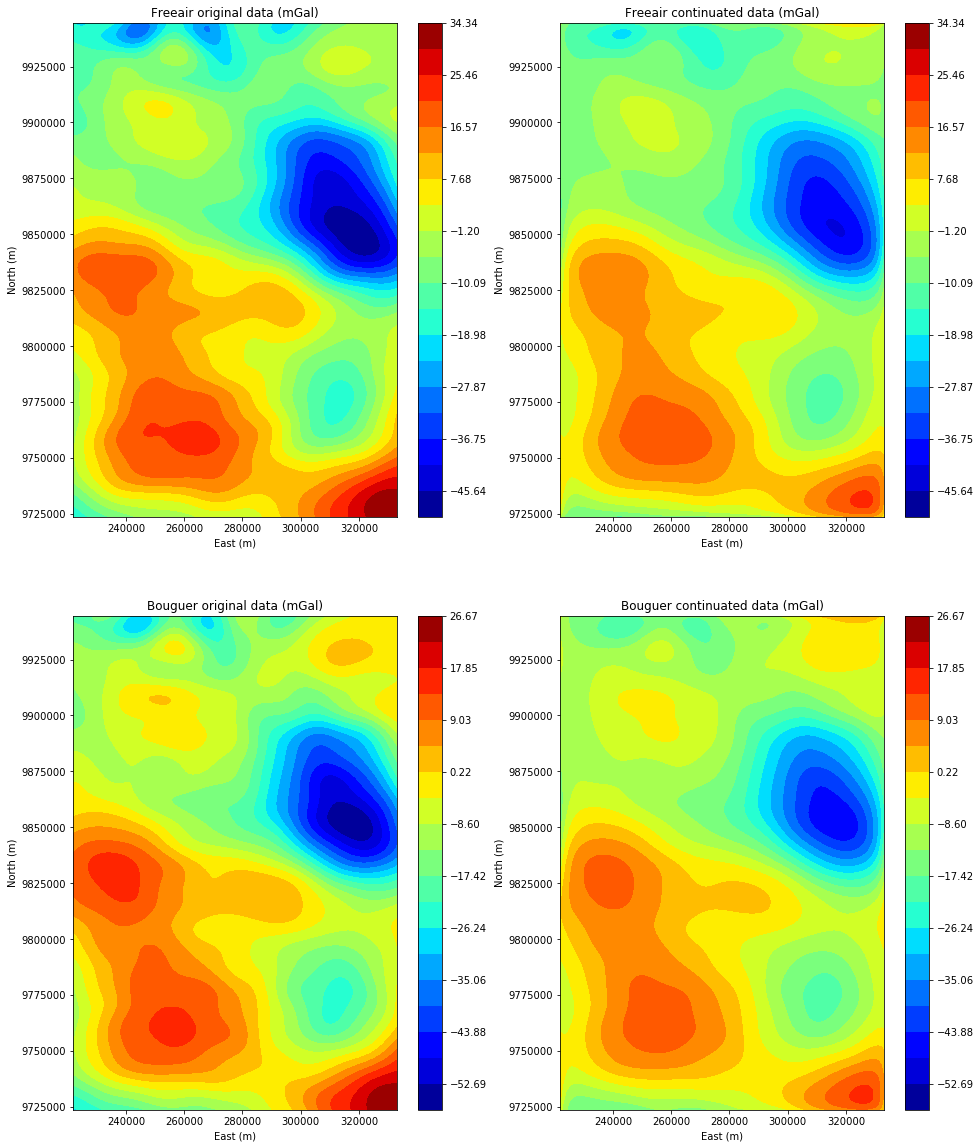

In [44]:
plt.close('all')
plt.figure(figsize = (16,20))

plt.subplot(2,2,1)
plt.title('Freeair original data (mGal)')
f1 = plt.contourf(Xgrid, Ygrid, Freeair, facor, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar(f1)
plt.clim(np.min(facor), np.max(facor))

plt.subplot(2,2,2)
plt.title('Freeair continuated data (mGal)')
f2 = plt.contourf(Xgrid, Ygrid, Freeair_upward, facor, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar(f2)
plt.clim(np.min(facor), np.max(facor))

plt.subplot(2,2,3)
plt.title('Bouguer original data (mGal)')
f3 = plt.contourf(Xgrid, Ygrid, Bouguer, bgcor, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar(f3)
plt.clim(np.min(bgcor), np.max(bgcor))

plt.subplot(2,2,4)
plt.title('Bouguer continuated data (mGal)')
f4 = plt.contourf(Xgrid, Ygrid, Bouguer_upward, bgcor, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar(f4)
plt.clim(np.min(bgcor), np.max(bgcor))

plt.savefig('figs/gravityanomaly.png')
plt.show()